In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [3]:

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [17]:
# Creating X and y

X = insurance.drop("charges", axis = 1)
y = insurance["charges"]

In [24]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

# Built training and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# create a column transformer

ct = make_column_transformer(
    (
        (MinMaxScaler(), ["age", "bmi", "children"]) 
    ),

    (
        (OneHotEncoder(handle_unknown = "ignore"), ["sex", "smoker", "region"])
    )
)

# Fit the column transfer to our training data

ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler and OneHotEncoder)

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [66]:
# Now build neural network

#                   1. Create a model

insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "relu"),
    tf.keras.layers.Dense(1, activation = None)
])



#                   2. Compile a model

insurance_model.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.Adam(learning_rate = 0.1),
                        metrics = ["mae"])



#                   3. Fit the model

loss =insurance_model.fit(X_train_normal, y_train, epochs = 150)

Epoch 1/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 12532.2627 - mae: 12532.2627
Epoch 2/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8108.3564 - mae: 8108.3564   
Epoch 3/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6390.7383 - mae: 6390.7383 
Epoch 4/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3900.9993 - mae: 3900.9993 
Epoch 5/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3271.2544 - mae: 3271.2544 
Epoch 6/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3259.4810 - mae: 3259.4810 
Epoch 7/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3368.7063 - mae: 3368.7063 
Epoch 8/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3128.4246 - mae: 3128.4246 
Epoch 9/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3505.7817 - mae: 3505.7817 
Epoch 10/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3077.5168 - mae: 3077.5168 
Epoch 11/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3118.3325 - mae: 3118.3325 
Epoch 12/150
34/34 ━━━━━━━━━━━━━━━━━━━

In [67]:
insurance_model.evaluate(X_test_normal, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1885.6552 - mae: 1885.6552  


[1875.6522216796875, 1875.6522216796875]

Text(0.5, 0, 'Epochs')

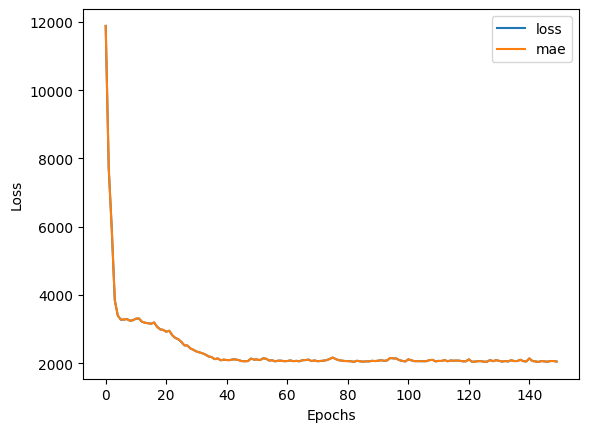

In [68]:
pd.DataFrame(loss.history).plot()
plt.ylabel("Loss")
plt.xlabel("Epochs")